In [ ]:
# https://cantera.org/examples/jupyter/index.html

In [1]:
%matplotlib notebook
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

## Complete Combustion

In [2]:
# Get all of the Species objects defined in the GRI 3.0 mechanism
species = {S.name: S for S in ct.Species.listFromFile('gri30.cti')}

# Create an IdealGas object with species representing complete combustion
complete_species = [species[S] for S in ('CH4','O2','N2','CO2','H2O')]
gas1 = ct.Solution(thermo='IdealGas', species=complete_species)

phi = np.linspace(0.5, 2.0, 100)
T_complete = np.zeros(phi.shape)
for i in range(len(phi)):
    gas1.TP = 300, ct.one_atm
    gas1.set_equivalence_ratio(phi[i], 'CH4', 'O2:1, N2:3.76')
    gas1.equilibrate('HP')
    T_complete[i] = gas1.T 

<IPython.core.display.Javascript object>


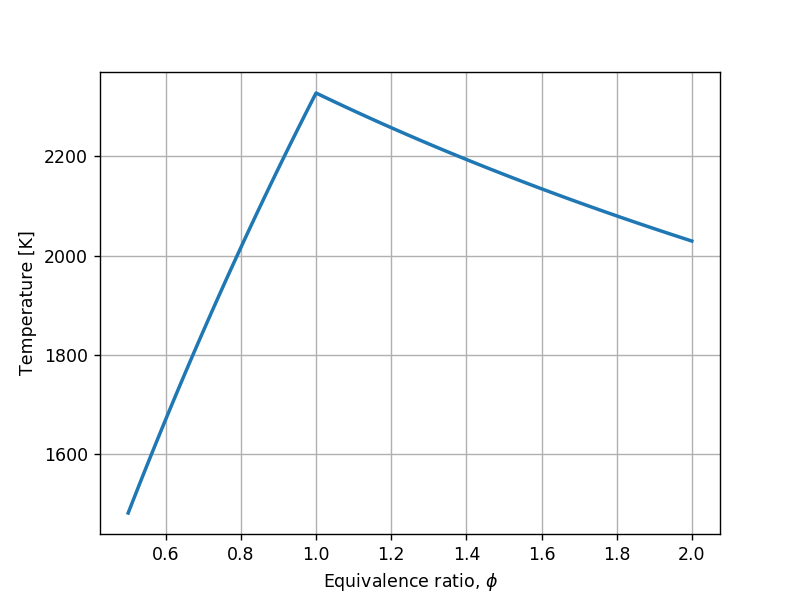

Text(0, 0.5, 'Temperature [K]')

In [3]:
plt.plot(phi, T_complete, label='complete combustion', lw=2)
plt.grid(True)
plt.xlabel('Equivalence ratio, $\phi$')
plt.ylabel('Temperature [K]')

## Incomplete Combustion

In [4]:
# Create an IdealGas object including incomplete combustion species
gas2 = ct.Solution(thermo='IdealGas', species=species.values())
T_incomplete = np.zeros(phi.shape)
for i in range(len(phi)):
    gas2.TP = 300, ct.one_atm
    gas2.set_equivalence_ratio(phi[i], 'CH4', 'O2:1, N2:3.76')
    gas2.equilibrate('HP')
    T_incomplete[i] = gas2.T

<IPython.core.display.Javascript object>


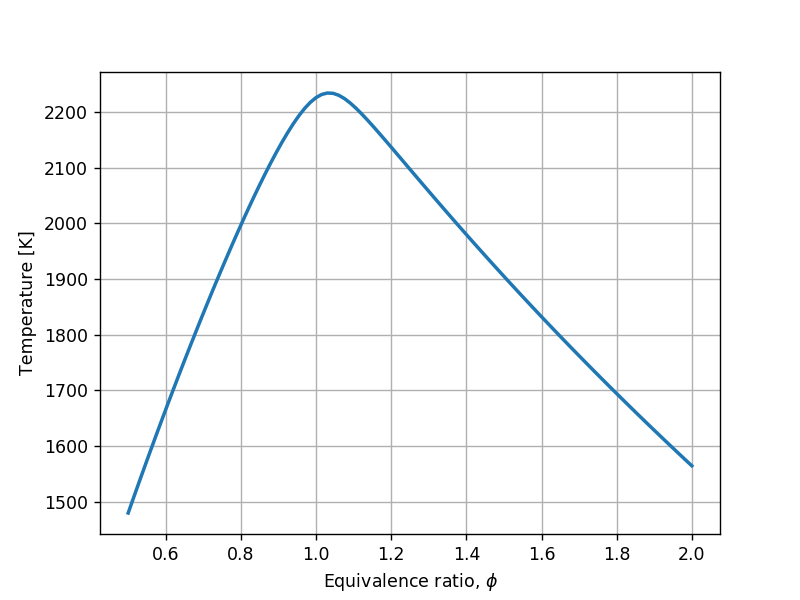

Text(0, 0.5, 'Temperature [K]')

In [5]:
plt.plot(phi, T_incomplete, label='incomplete combustion', lw=2)
plt.grid(True)
plt.xlabel('Equivalence ratio, $\phi$')
plt.ylabel('Temperature [K]')

## Plots together

<IPython.core.display.Javascript object>


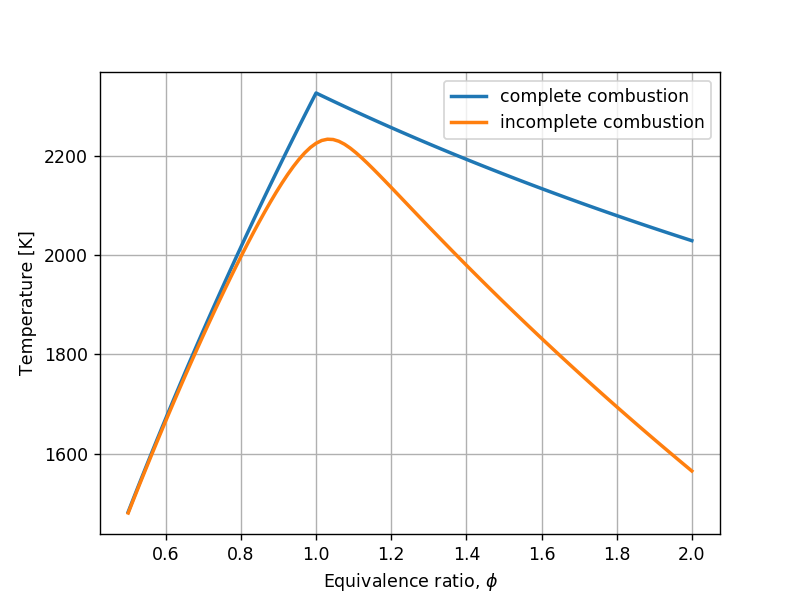

In [6]:
plt.plot(phi, T_complete, label='complete combustion', lw=2)
plt.plot(phi, T_incomplete, label='incomplete combustion', lw=2)
plt.grid(True)
plt.xlabel('Equivalence ratio, $\phi$')
plt.ylabel('Temperature [K]')
plt.legend(loc = "upper right")

## Check compositions at certain phi

In [49]:
gas3 = ct.Solution(thermo='IdealGas', species=species.values())
gas3.TP = 300, ct.one_atm
phi = 2
gas3.set_equivalence_ratio(phi, 'CH4', 'O2')

In [50]:
# get initial mixture molar fraction
gas3.mole_fraction_dict()

{'CH4': 0.5, 'O2': 0.5}

In [51]:
gas3.equilibrate('HP')
T_incomplete = gas3.T

In [52]:
# Temperature
T_incomplete

2610.671682336521

In [53]:
# Major gas composition
gas3['CH4', 'CO2', 'CO', 'H2', 'H2O', 'N2', 'O2'].X

array([1.09399241e-10, 3.63712928e-02, 2.92135520e-01, 3.55501353e-01,
       2.87296829e-01, 0.00000000e+00, 6.44972421e-05])

In [38]:
# need to know how equivalent ratio is defined in Cantera
help('set_equivalence_ratio')

No Python documentation found for 'set_equivalence_ratio'.
Use help() to get the interactive help utility.
Use help(str) for help on the str class.



In [54]:
# https://cantera.org/documentation/docs-2.4/sphinx/html/cython/importing.html?highlight=set_equivalence_ratio#cantera.Quantity.set_equivalence_ratio